<a href="https://colab.research.google.com/github/aiswaryam2005/Indian-Currency-Classification-System-for-Visually-Impaired-Paired-People/blob/main/cnn_with_relu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 1280 images belonging to 10 classes.
Found 80 images belonging to 10 classes.
Epoch 1/50
40/40 [==============================] - 410s 10s/step - loss: 2.7289 - accuracy: 0.3039 - val_loss: 12.3333 - val_accuracy: 0.0625 - lr: 0.0010
Epoch 2/50
40/40 [==============================] - 119s 3s/step - loss: 1.1255 - accuracy: 0.6516 - val_loss: 7.8938 - val_accuracy: 0.1094 - lr: 0.0010
Epoch 3/50
40/40 [==============================] - 113s 3s/step - loss: 0.6159 - accuracy: 0.7930 - val_loss: 4.6543 - val_accuracy: 0.2031 - lr: 0.0010
Epoch 4/50
40/40 [==============================] - 112s 3s/step - loss: 0.3059 - accuracy: 0.9039 - val_loss: 5.1715 - val_accuracy: 0.2344 - lr: 0.0010
Epoch 5/50
40/40 [==============================] - 112s 3s/step - loss: 0.2494 - accuracy: 0.9164 - val_loss: 1.6409 - val_accuracy: 0.4844 - lr: 0.0010
Epoch 6/50
40/40 [==============================] - 113s 3s/step - loss: 0.1378 - accuracy: 0.9508 - val_loss: 3.0080 - val_accuracy: 0.3281 - l

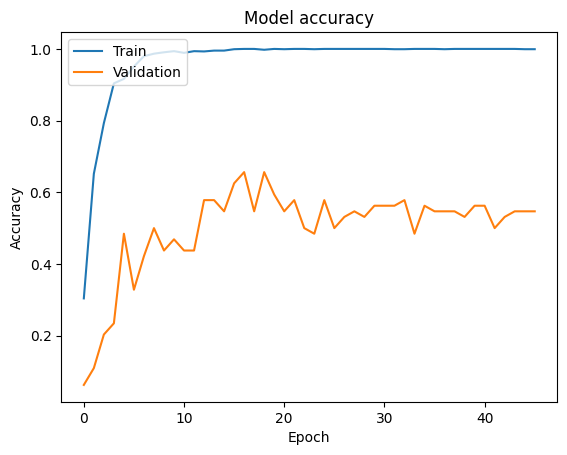

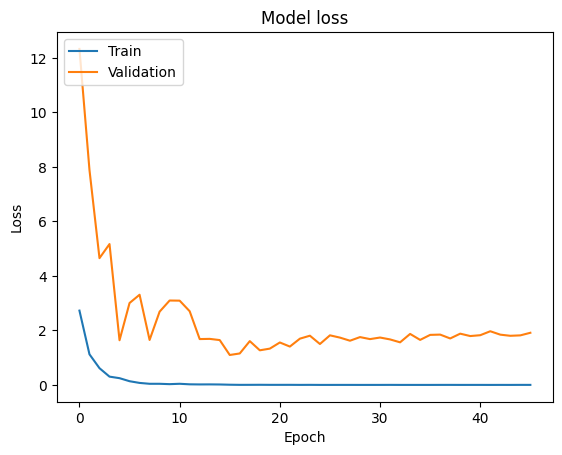

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

# Define paths
train_dir = '/content/drive/MyDrive/IndianBankNotes/Training'
validation_dir = '/content/drive/MyDrive/IndianBankNotes/Validation'

# Data generator without normalization or augmentation
train_datagen = ImageDataGenerator(validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.00001, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50,  # Increase the number of epochs for better results
    callbacks=[reduce_lr, early_stopping]
)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Save the model
model.save('indian_currency_classifier_improved.h5')


In [ ]:
import numpy as np
# Load the model
model = tf.keras.models.load_model('indian_currency_classifier_improved.h5')

# Get class labels
class_names = list(train_generator.class_indices.keys())

# Predict on the validation dataset
val_generator = validation_generator
val_generator.reset()  # Reset the generator to start from the beginning
predictions = model.predict(val_generator, steps=val_generator.samples // val_generator.batch_size, verbose=1)

# Convert predictions to class labels
predicted_class_indices = np.argmax(predictions, axis=1)

# Get true labels
true_class_indices = val_generator.classes
true_class_indices = true_class_indices[:len(predicted_class_indices)]  # Ensure the lengths match

# Get class labels
class_labels = list(val_generator.class_indices.keys())

# Print results
for i, (true_idx, pred_idx) in enumerate(zip(true_class_indices, predicted_class_indices)):
    true_label = class_labels[true_idx]
    pred_label = class_labels[pred_idx]
    print(f"Sample {i}: True Label: {true_label}, Predicted Label: {pred_label}")

# Print overall accuracy on validation dataset
val_loss, val_accuracy = model.evaluate(val_generator, verbose=1)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


2/2 [==============================] - 3s 1s/step
Sample 0: True Label: INDIA100NEW, Predicted Label: INDIA50OLD
Sample 1: True Label: INDIA100NEW, Predicted Label: INDIA10NEW
Sample 2: True Label: INDIA100NEW, Predicted Label: INDIA2000
Sample 3: True Label: INDIA100NEW, Predicted Label: INDIA100NEW
Sample 4: True Label: INDIA100NEW, Predicted Label: INDIA500
Sample 5: True Label: INDIA100NEW, Predicted Label: INDIA100NEW
Sample 6: True Label: INDIA100NEW, Predicted Label: INDIA500
Sample 7: True Label: INDIA100NEW, Predicted Label: INDIA10NEW
Sample 8: True Label: INDIA100OLD, Predicted Label: INDIA10NEW
Sample 9: True Label: INDIA100OLD, Predicted Label: INDIA20
Sample 10: True Label: INDIA100OLD, Predicted Label: INDIA50NEW
Sample 11: True Label: INDIA100OLD, Predicted Label: INDIA10NEW
Sample 12: True Label: INDIA100OLD, Predicted Label: INDIA50NEW
Sample 13: True Label: INDIA100OLD, Predicted Label: INDIA10NEW
Sample 14: True Label: INDIA100OLD, Predicted Label: INDIA100NEW
Sampl

3/3 [==============================] - 4s 778ms/step


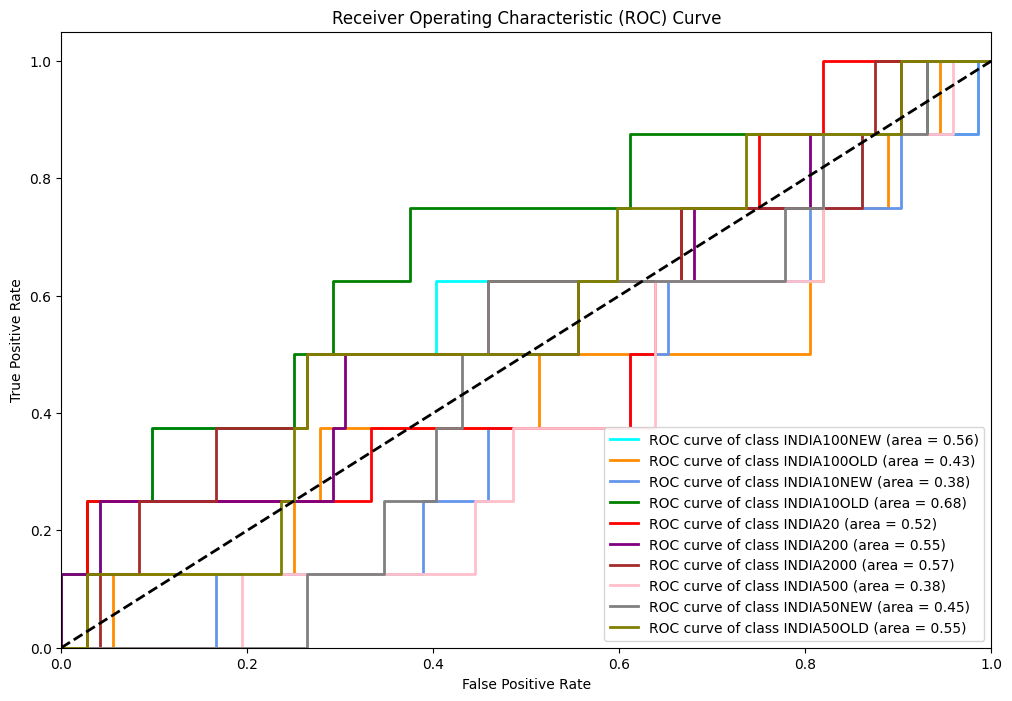

Classification Report:
              precision    recall  f1-score   support

 INDIA100NEW       0.27      0.38      0.32         8
 INDIA100OLD       0.00      0.00      0.00         8
  INDIA10NEW       0.04      0.12      0.06         8
  INDIA10OLD       0.40      0.25      0.31         8
     INDIA20       0.50      0.25      0.33         8
    INDIA200       0.00      0.00      0.00         8
   INDIA2000       0.20      0.12      0.15         8
    INDIA500       0.00      0.00      0.00         8
  INDIA50NEW       0.00      0.00      0.00         8
  INDIA50OLD       0.10      0.12      0.11         8

    accuracy                           0.12        80
   macro avg       0.15      0.12      0.13        80
weighted avg       0.15      0.12      0.13        80



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


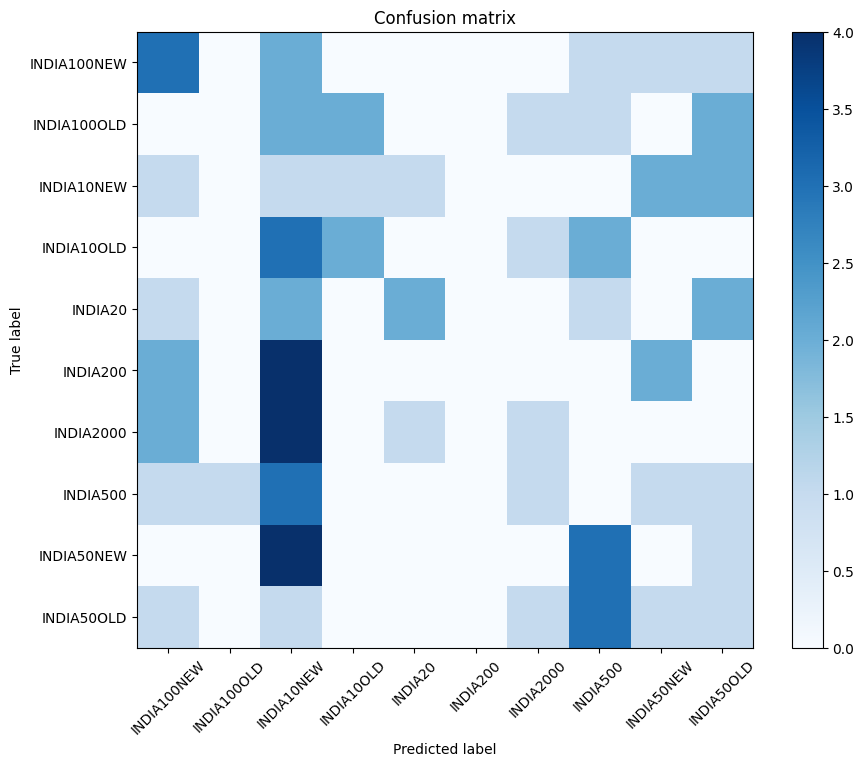

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Predict probabilities for validation data
validation_generator.reset()  # Reset generator to start for validation data
y_pred = model.predict(validation_generator)

# Get true classes
y_true = validation_generator.classes

# Get class labels
class_labels = list(validation_generator.class_indices.keys())

# Binarize the output
n_classes = len(validation_generator.class_indices)
y_true_binarized = label_binarize(y_true, classes=list(range(n_classes)))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(12, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_labels[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, np.argmax(y_pred, axis=1), target_names=class_labels))

# Plot confusion matrix
cm = confusion_matrix(y_true, np.argmax(y_pred, axis=1))
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(validation_generator.class_indices))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Predict probabilities for validation data
validation_generator.reset()  # Reset generator to start for validation data
y_pred = model.predict(validation_generator)

# Get true classes
y_true = validation_generator.classes

# Get class labels
class_labels = list(validation_generator.class_indices.keys())

# Convert predicted probabilities to class labels
y_pred_class = np.argmax(y_pred, axis=1)

# Calculate model evaluation accuracy
eval_result = model.evaluate(validation_generator)
model_accuracy = eval_result[1]  # Assuming the second value is accuracy

# Generate classification report
report = classification_report(y_true, y_pred_class, target_names=class_labels, output_dict=True)

# Extract metrics
report_accuracy = report['accuracy']
macro_precision = report['macro avg']['precision']
macro_recall = report['macro avg']['recall']
macro_f1 = report['macro avg']['f1-score']
weighted_precision = report['weighted avg']['precision']
weighted_recall = report['weighted avg']['recall']
weighted_f1 = report['weighted avg']['f1-score']

# Print metrics
print(f"Model Evaluation Accuracy: {model_accuracy:.2f}")
print(f"Classification Report Accuracy: {report_accuracy:.2f}")
print(f"Macro Precision: {macro_precision:.2f}")
print(f"Macro Recall: {macro_recall:.2f}")
print(f"Macro F1-score: {macro_f1:.2f}")
print(f"Weighted Precision: {weighted_precision:.2f}")
print(f"Weighted Recall: {weighted_recall:.2f}")
print(f"Weighted F1-score: {weighted_f1:.2f}")


3/3 [==============================] - 3s 750ms/step - loss: 1.2820 - accuracy: 0.6125
Model Evaluation Accuracy: 0.61
Classification Report Accuracy: 0.10
Macro Precision: 0.10
Macro Recall: 0.10
Macro F1-score: 0.09
Weighted Precision: 0.10
Weighted Recall: 0.10
Weighted F1-score: 0.09


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3/3 [==============================] - 4s 760ms/step


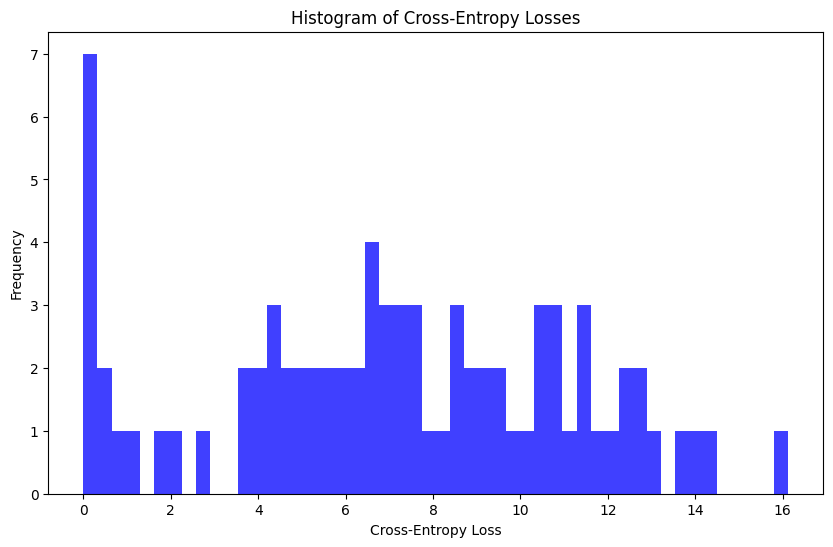

Average Cross-Entropy Loss: 7.0982


In [ ]:
import tensorflow as tf
from tensorflow.keras.losses import categorical_crossentropy
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for validation data
validation_generator.reset()  # Reset generator to start for validation data
y_pred = model.predict(validation_generator)

# Get true classes
y_true = validation_generator.classes

# Convert true labels to categorical format
y_true_categorical = tf.keras.utils.to_categorical(y_true, num_classes=len(validation_generator.class_indices))

# Compute cross-entropy loss for each sample
cross_entropy_losses = categorical_crossentropy(y_true_categorical, y_pred)

# Plot histogram of cross-entropy losses
plt.figure(figsize=(10, 6))
plt.hist(cross_entropy_losses, bins=50, alpha=0.75, color='blue')
plt.xlabel('Cross-Entropy Loss')
plt.ylabel('Frequency')
plt.title('Histogram of Cross-Entropy Losses')
plt.show()

# Print average cross-entropy loss
average_loss = np.mean(cross_entropy_losses)
print(f'Average Cross-Entropy Loss: {average_loss:.4f}')

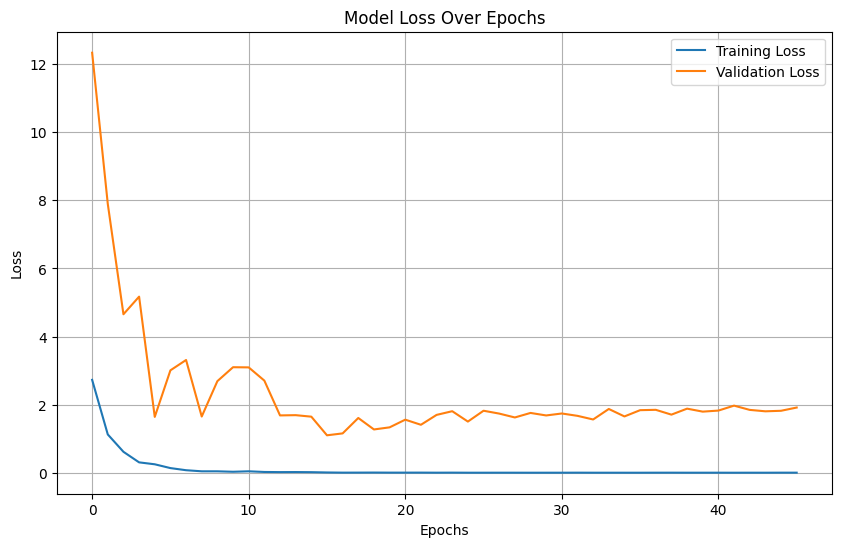

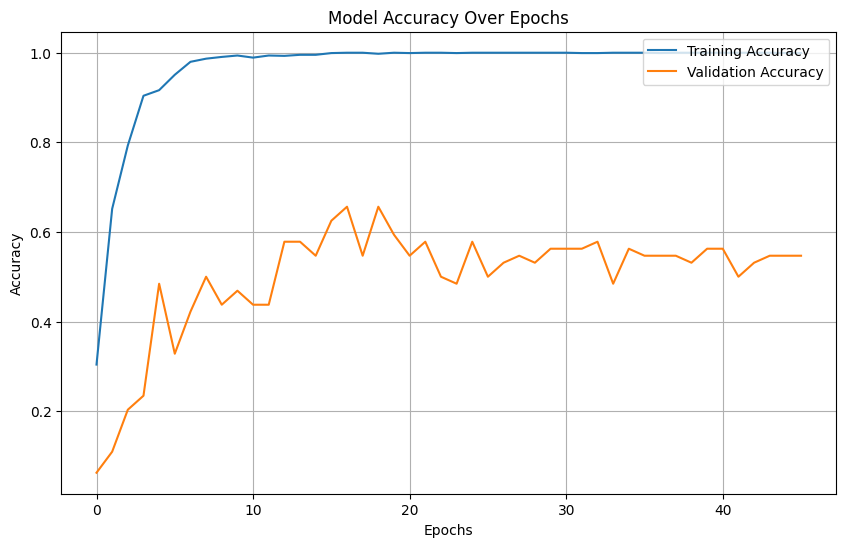

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

3/3 [==============================] - 3s 656ms/step


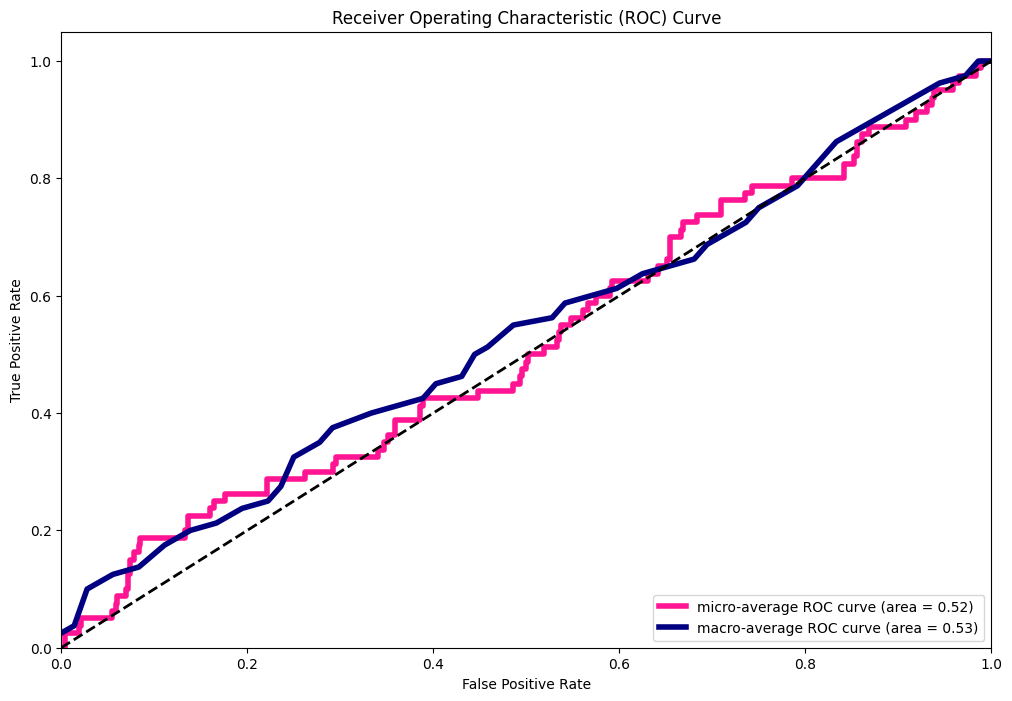

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Predict probabilities for validation data
validation_generator.reset()  # Reset generator to start for validation data
y_pred = model.predict(validation_generator)

# Get true classes
y_true = validation_generator.classes

# Binarize the output
n_classes = len(validation_generator.class_indices)
y_true_binarized = label_binarize(y_true, classes=list(range(n_classes)))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_binarized.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot macro-average ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle='-', linewidth=4,
         label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})')
plt.plot(fpr["macro"], tpr["macro"], color='navy', linestyle='-', linewidth=4,
         label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
